# Variables

In [1]:
%load ../../rapaio-bootstrap

Variable represents unidimensional sets of observations which comes from the same random variable (hence the name). Because the values of a variable are supposed to be generated from the same process, they have the same type and semantic. Variables have names and are of some given types. `Var` implementations can be categorized as storage variables and view variables. Storage variables are those variables which directly contains and maintain data. View variables are higher constructs obtained by filtering and/or merging other variables. View variables does not contain data directly, but maintain refferences to storage variables it wrap and allows reading and updating operations in the same way as storage variables. 

Strorage variables implemented have different storage types and representations. We have `VarDouble`, `VarInt`, `VarNominal`, `VarBinary`, `VarLong`, `VarString` and `VarInstant`.

## VarDouble

Numeric double variables are implemented by `VarDouble` and are used to handle discrete or continuous numerical values. Double variables offers value and label representations. All other representations can be used, but with caution since it can alter the content. For example int representation truncates floating point values to the biggest integer values, however the int setter sets a correct value since an integer can be converted to a double with no information loss.

### Various builders

Double variables can be built in various was and there are handy shortcuts for various scenarios.

In [2]:
// builds a variable with no data
Var empty1 = VarDouble.empty();

// builds a variable of a given size which contains only missing data
Var empty2 = VarDouble.empty(100);

// a sequence of numbers, starting from 0, ending with 5 with step 1
Var seq1 = VarDouble.seq(5);

// a sequence of numbers, starting from 1, ending with 5 with step 1
Var seq2 = VarDouble.seq(1, 5);

// a sequence of numbers starting at 0, ending at 1 with step 0.1
Var seq3 = VarDouble.seq(0, 1, 0.1);

// build a variable of a given size which contains only zeros
Var fill1 = VarDouble.fill(5);

// builds a variable of a given size which contains only ones
Var fill2 = VarDouble.fill(5, 1);

// numeric variable which contains the values copied from another variable
Var copy1 = VarDouble.copy(seq1);

// numeric variable with values copied from a collection
Normal normal = Normal.std();
List<Double> list1 = DoubleStream.generate(normal::sampleNext).limit(10).boxed().collect(Collectors.toList());
Var copy2 = VarDouble.copy(list1);

// numeric variable with values copied from a double array
Var copy3 = VarDouble.copy(1, 3, 4.0, 7);

// numeric variable with values copied from an int array
Var copy4 = VarDouble.copy(1, 3, 4, 7);

// numeric variables with values generated as the sqrt of the row number
Var from1 = VarDouble.from(10, Math::sqrt);

// numeric variable with values generated using a function which receives a row value
// as parameter and outputs a double value; in this case we generate values as
// a sum of the values of other two variables
Var from2 = VarDouble.from(4, row -> copy3.getDouble(row) + copy4.getDouble(row));

// numeric variable with values generated from values of another variable using
// a transformation provided via a lambda function
Var from3 = VarDouble.from(from1, x -> x + 1);

**Wrapper around a double array**
This builder creates a new numeric variable instance as a wrapper around a double array of values. Notice that it is not the same as the copy builder, since in the wrapper case any change in the new numerical variable is reflected also in the original array of numbers. In the case of the copy builder this is not true, since the copy builder \(as its name implies\) creates an internal copy of the array.


In [3]:
double[] array = DoubleArrays.newFrom(1, 5, x -> x*x);
Var wrap1 = VarDouble.wrap(array);

wrap1.printString();
array[2] = 17;
wrap1.printString();

VarDouble [name:"?", rowCount:4, values: 1.0, 4.0, 9.0, 16.0]
VarDouble [name:"?", rowCount:4, values: 1.0, 4.0, 17.0, 16.0]


#### Printing variables

Most of the objects which contains information implements the `Printable` interface. This interface allows one to display a summary of the content of the given object. This is the case also with the numerical variables. Additionally, the numerical variables implements also two other methods, one which displays all the values and another one which displays only the first values.

In [4]:
// build a numerical variable with values as the sqrt
// of the first 200 integer values
Var x = VarDouble.from(200, Math::sqrt).name("x");

// prints the text produced by toString 
x.printString();

// print a reasonable part of value
x.printContent();

// print all values of the variable
x.printFullContent();

// print a summary of the content of the variable
x.printSummary();

VarDouble [name:"x", rowCount:200, values: 0.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907, 2.8284271247461903, 3.0, ..., 14.071247279470288, 14.106735979665885]
VarDouble [name:"x", rowCount:200]
 row         value         row         value         row         value         row         value         row         value         row         value        
  [0]  0                   [17]  4.123105625617661   [34]  5.830951894845301   [51]  7.14142842854285    [68]  8.246211251235321  [185] 13.601470508735444  
  [1]  1                   [18]  4.242640687119285   [35]  5.916079783099616   [52]  7.211102550927978   [69]  8.306623862918075  [186] 13.638181696985855  
  [2]  1.4142135623730951  [19]  4.358898943540674   [36]  6                   [53]  7.280109889280518   [70]  8.366600265340756  [187] 13.674794331177344  
  [3]  1.7320508075688772  [20]  4.47213595499958    [37]  6.082762530298219   [54]  7.3484692283495345  [71]  8

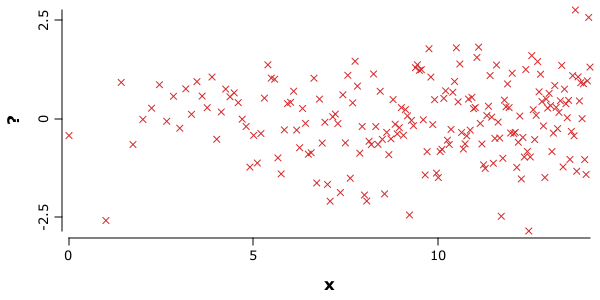

In [5]:
WS.image(points(x, VarDouble.from(x.size(), Normal.std()::sampleNext), color(1), pch(3)), 600, 300);

#### VarOp interface
There are various mathemaical operations available under VarOp interface. The interface to those operators can be called using `op()` method on any variable. The fllowing examples uses some of those operators.

In [6]:
// computes the sum of all values in variable
x.dv().nansum();

1878.3420754046178

In [7]:
// apply a lambda function on a copy of the varialble
x.copy().dv().apply(v -> Math.sqrt(v + 3./8)).printContent();

  [0] 0.6123724356957945   [6] 1.6806218321749773  [12] 1.9593625532651568  [18] 2.1488696300891044 
  [1] 1.1726039399558574   [7] 1.7380308717236845  [13] 1.9951318942526053  [19] 2.175752500524973  
  [2] 1.337614878196671    [8] 1.7898120361496597  [14] 2.0289547522736777  ...         ...         
  [3] 1.4515683957598682   [9] 1.8371173070873836  [15] 2.061063644385446  [198] 3.8008219215677927 
  [4] 1.541103500742244   [10] 1.8807651794331954  [16] 2.091650066335189  [199] 3.80548761391571   
  [5] 1.6158799390733798  [11] 1.9213601407220355  [17] 2.120873788233911  



In [8]:
// add a constant to all values of a copy
x.copy().dv().add(Math.E);

DVectorDense{size:200, values:[2.7182818,3.7182818,4.1324954,4.4503326,4.7182818,4.9543498,5.1677716,5.3640331,5.546709,5.7182818,5.8805595,6.0349066,6.1823834,6.3238331,6.4599392,6.5912652,6.7182818,6.8413875,6.9609225,7.0771808,...]}

## Nominal variables

Nominal variables are defined by`VarNominal`and contains string valued categories. Nominal variables offers integer and label representations. The label representation describes the categories as labels or texts, while integer representation is an integer indexe on categories. The index representation does not imply an order between categories/labels. 

### Various builders

Nominal variables can be built in various was and are handy shortcuts for various scenarios.

In [ ]:
// creates an empty nominal variable with provided levels
var nom1 = VarNominal.empty(10, "a", "b");
// note the first label which is a placeholder for missing values
nom1.levels();

In [ ]:
VarNominal.from(10, row -> row % 2 == 0 ? "even" : "odd").printString();

In [ ]:
VarNominal.copy("a", "b", "c", "b").printContent()

In [ ]:
Unique.of(VarNominal.copy("a","b","c","b"))

## Overview of variable types

All variables implements a common API making easy the manipulation of it's content in a generic way. However, depending on type, some variables might not implement some operations or rely back on specific implementations which makes sense for that variable type. For example, for a numeric variable it makes sense to set the value at some specific index in order to change it. For nominal variables, the same operation would not make sense. Instead of the meaning 'change numerical value at some given position' will have the following semantic 'change the string value to that category associated with the rounded integer value of the double parameter'. Let's see an example:  

In [ ]:
// we create a nominal value with label `a` of first position and label `b` on the second position
var nom = VarNominal.copy("a", "b");
nom.printString();

// set the value from the first position to the label which corresponds to indexed label 2, which is `b`
nom.setDouble(0, 2.1);
// let's see the result
nom.printString();

### Missing values

All variables offers API for missing values. A missing value is a special value which is used as placeholder for an unspecified value. We can have missing values for various reasons. There are cases when the data set does not contains some values because the experimenter did not collect it. Sometimes having a value does not make sense, for example a male cannot be pregnant, so measuring any metric related with pregnancy have missing value for male subjects. Also, missing values can appear as an effect of data manipulation operations, like joining two data frames which does not present a one-to-one presence relation.

Missing values are different for each representation, which makes sense since a double value have a different type than a String. 

In [14]:
WS.println(VarDouble.MISSING_VALUE);
WS.println(VarNominal.MISSING_VALUE);
WS.println(VarInt.MISSING_VALUE);

NaN
?
2.147483647E9


Most of time we do not have to deals directly with the missing value placeholders, since `Var` and `Frame` interfaces offers a way to handle gracefully missing value operations. Below is an illustrative example:

In [15]:
var x = VarDouble.seq(10).name("x");
x.printString();

VarDouble [name:"x", rowCount:11, values: 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [16]:
// put missing on values from indexes 2,4 and 6
x.setMissing(2);
x.setMissing(4);
x.setMissing(6);
x.printString();

VarDouble [name:"x", rowCount:11, values: 0.0, 1.0, ?, 3.0, ?, 5.0, ?, 7.0, 8.0, 9.0, 10.0]


In [17]:
// count the number of non missing values
x.stream().complete().count();

8

In [18]:
// compute the sum of all non missing values
x.dv().nansum();

43.0

### Var Iterators

Each `Var` allows easy data manipulation through iterators. There is a generic construct available for each variable implementation which under the form of `VSpot`. In the terminology used in `rapaio` a spot is a position in a variable which can contain a value. Since that value can have different reporesentation, the `VSpot` interface is used to manipulate what happen in a given position. Additionally there are various iterators which can be used for other data representations. The example below are illustrative:

In [19]:
var d = VarDouble.seq(3).name("d");

In [20]:
// iterate through double values, we can do this because we have the specific type VarDouble
for(double value : d) WS.println(value)

0.0
1.0
2.0
3.0


In [21]:
// for each spot print the string representation
d.forEachSpot(s -> WS.println(s.getLabel()))

0.0
1.0
2.0
3.0


In [22]:
// compute the sum using spot iterator and streaming API
WS.println(d.stream().mapToDouble(VSpot::getDouble).sum());
WS.println(d.dv().nansum());

6.0
6.0


In [23]:
// display the row indexes of all values which are missing
var y = VarDouble.copy(1, Double.NaN, 2, Double.NaN, 3);
// collect indexes to an int array
int[] indexes = y.stream().filter(s -> !s.isMissing()).mapToInt(s -> s.row()).toArray();
// create a var int wrapper to see the content
VarInt.wrap(indexes).printString();

VarInt [name:"?", rowCount:3, values: 0, 2, 4]
